<a href="https://colab.research.google.com/github/joungminhee/Senior_project_/blob/master/Selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 동적 웹페이지와 정적웹페이지 

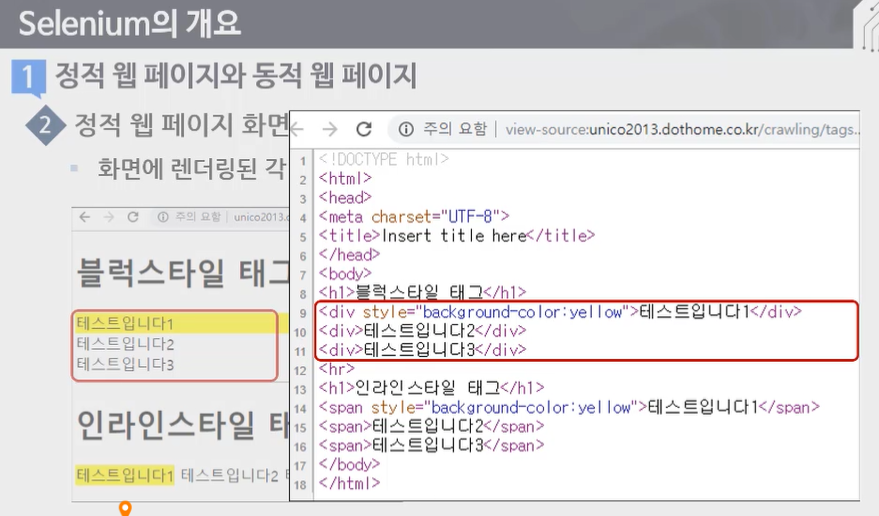

* 동적 웹 페이지 : 
 * java script 프로그래밍 언어로 브라우저에서 실행시킨 코드에 의해 웹 페이지의 내용을 렌더링시 자동 생성 
 * 웹 서버에서 전송된 웹 페이지의 소스에서 화면에 렌더링 된 내용을 일부 찾을 수 없는경우 

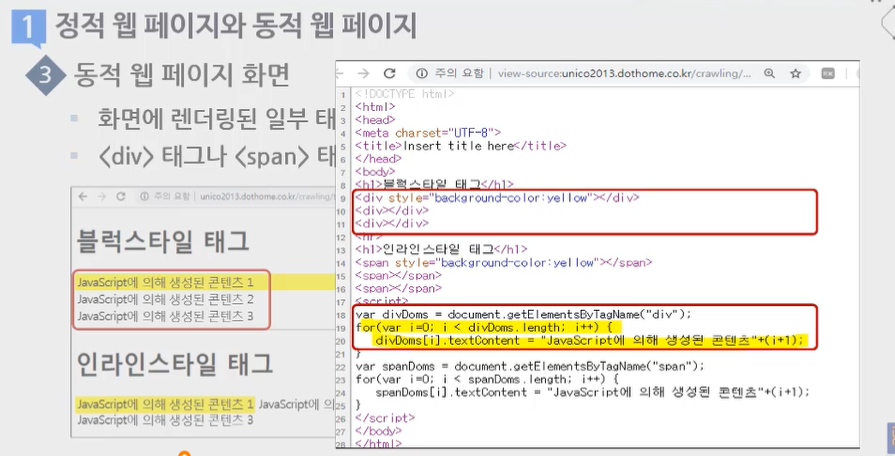

**Selenium ?**
 * WebDriver라는 API를 통해 운영체제에 설치된 크롬이나 파이어폭스 등의 브라우저를 기동시키고 웹 페이지를 로드하고 제어 
 * 브라우저를 직접 동작시킨다 = JavaScript에 의해 생성되는 콘텐츠와 Ajax 통신 등을 통해 뒤늦게 브라우저에 로드되는 컨텐츠를 처리할 수 있음을 의미 

1. 셀레니움 설치 
 * !pip install selenium
2. 크롬 드라이버 설치 
 * 크롬 버전 체크 및 다운로드 (윈도우는 32비트 가능) 
 * chromedriver.exe 를 적당한 디렉토리에 복사 

In [ ]:
# 설치는 한번만 하면 된다고 함.
!pip install selenium              # 동적 웹페이지를 크롤링하기 위한 라이브러리
!pip install urllib
!pip install pandas
!pip install webdriver-manager
!pip install beautifulsoup4        # 정적 웹페이지를 크롤링을 할 수 있는 라이브러리
!apt install chromium-chromedriver # 크롬드라이버

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.10-py2.py3-none-any.whl (139 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.10 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.10
    Uninstalling urllib3-1.26.10:
      Successfully uninstalled urllib3-1.26.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.3.0 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have fol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (101.0.4951.64-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# Import

In [ ]:
import time # 웹 페이지가 읽어들여질때까지 잠깐 기다려주는 것. 
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox') # sandbox 기능을 비활성화 하기
chrome_options.add_argument('--disable-dev-shm-usage') # dev/shm/ 폴더를 사용하지 않기
driver = webdriver.Chrome('chromedriver',options=chrome_options) # ,options=chrome_options

In [ ]:
# driver.current_url  = 현재 url을 가르쳐 준다.
# driver.page_source = 현재 페이지 소스를 보여준다.

In [ ]:
# 1페이지 클릭
# driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[3]/a').click()

## BeautifulSoup / Selenuim 활용

In [ ]:
#사용할 URL
driver.get("https://www.myhome.go.kr/hws/portal/cmt/selectCmtSrvCntrListView.do")
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')

In [ ]:
temp = bsObject.find_all("table")[0]
temp

<table cellspacing="0" class="bbs_type1" summary="전국민주민센터검색">
<caption>전국민주민센터검색</caption>
<colgroup>
<col width="10%"/>
<col width="35%"/>
<col width="20%"/>
<col width=""/>
</colgroup>
<thead>
<tr>
<th>번호</th>
<th>주민센터명</th>
<th class="al">대표전화번호</th>
<th>주소</th>
</tr>
</thead>
<tbody id="schTbody"><tr><td>1</td><td>청운효자동 주민센터</td><td class="al">02-2148-5002</td><td class="al"><a href="javascript:fnRentalHouseInfoMap('jumin','11','110','10300','청운효자동 주민센터');">서울특별시 종로구 자하문로 92</a></td></tr><tr><td>2</td><td>사직동 주민센터</td><td class="al">02-2148-5033</td><td class="al"><a href="javascript:fnRentalHouseInfoMap('jumin','11','110','11500','사직동 주민센터');">서울특별시 종로구 사직로9길 1</a></td></tr><tr><td>3</td><td>종로1-4가동 주민센터</td><td class="al">02-2148-5243</td><td class="al"><a href="javascript:fnRentalHouseInfoMap('jumin','11','110','13800','종로1-4가동 주민센터');">서울특별시 종로구 종로17길 8</a></td></tr><tr><td>4</td><td>삼청동 주민센터</td><td class="al">02-2148-5062</td><td class="al"><a href="javascript:fnRentalHouseIn

In [ ]:
column = ["번호", "주민센터명", "대표전화번호", "주소"]
df = pd.DataFrame(columns = column)
templen = len(temp.find_all("tr"))
templen
print(df, templen)

Empty DataFrame
Columns: [번호, 주민센터명, 대표전화번호, 주소]
Index: [] 11


In [ ]:
column = ["번호", "주민센터명", "대표전화번호", "주소"]
df = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df = df.append(row,ignore_index=True)
df

,번호,주민센터명,대표전화번호,주소
0,1,청운효자동 주민센터,02-2148-5002,서울특별시 종로구 자하문로 92
1,2,사직동 주민센터,02-2148-5033,서울특별시 종로구 사직로9길 1
2,3,종로1-4가동 주민센터,02-2148-5243,서울특별시 종로구 종로17길 8
3,4,삼청동 주민센터,02-2148-5062,서울특별시 종로구 삼청로 107
4,5,가회동 주민센터,02-2148-5213,서울특별시 종로구 북촌로 35
5,6,종로5-6가동 주민센터,02-2148-5273,서울특별시 종로구 종로35가길 19
6,7,이화동 주민센터,02-2148-5304,서울특별시 종로구 이화장길 33
7,8,혜화동 주민센터,02-2148-5334,서울특별시 종로구 혜화로 12
8,9,창신1동 주민센터,02-2148-5392,서울특별시 종로구 지봉로 8-6
9,10,창신2동 주민센터,02-2148-5423,서울특별시 종로구 창신길 62


In [ ]:
# 2page : //*[@id="pageDiv"]/ul/li[4]/a
# 3page : //*[@id="pageDiv"]/ul/li[5]/a
# ...
# 10page : //*[@id="pageDiv"]/ul/li[12]/a
# 다음 : //*[@id="page_last_a"]
# 끝 : //*[@id="page_last"]/a

In [ ]:
# 2페이지 누르고 데이터 수집하는 방법.
# page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[4]/a')
# page.click()
# time.sleep(2)
# html = driver.page_source
# bsObject = BeautifulSoup(html, 'html.parser')
# temp = bsObject.find_all("table")[0]
# temp

In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[4]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df2 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df2 = df2.append(row,ignore_index=True)
df2

,번호,주민센터명,대표전화번호,주소
0,11,창신3동 주민센터,02-2148-5453,서울특별시 종로구 지봉로 87
1,12,숭인1동 주민센터,02-2148-5483,서울특별시 종로구 지봉로 86
2,13,숭인2동 주민센터,02-2148-5513,서울특별시 종로구 종로65길 10
3,14,교남동 주민센터,02-2148-5184,서울특별시 종로구 송월길 154
4,15,평창동 주민센터,02-2148-5122,서울특별시 종로구 평창문화로 65
5,16,부암동 주민센터,02-2148-5095,서울특별시 종로구 창의문로 145
6,17,무악동 주민센터,02-2148-5153,서울특별시 종로구 통일로14길 36
7,18,소공동 주민센터,02-3396-6500,서울특별시 중구 남대문로1길 31-5
8,19,회현동 주민센터,02-3396-6530,서울특별시 중구 퇴계로8길 46
9,20,명동 주민센터,02-3396-6560\n,서울특별시 중구 퇴계로20길 3


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[5]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df3 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df3 = df3.append(row,ignore_index=True)
df3

,번호,주민센터명,대표전화번호,주소
0,21,필동 주민센터,02-3396-6590,서울특별시 중구 퇴계로36길 42
1,22,장충동 주민센터,02-3396-6620,서울특별시 중구 장충단로8길 22
2,23,광희동 주민센터,02-3396-6650,서울특별시 중구 퇴계로 303-9
3,24,을지로동 주민센터,02-3396-6680,서울특별시 중구 충무로9길 19
4,25,다산동 주민센터,02-3396-6740,서울특별시 중구 동호로15길 50
5,26,동화동 주민센터,02-3396-6860,서울특별시 중구 다산로36길 100
6,27,신당5동 주민센터,02-3396-6830,서울특별시 중구 다산로44길 85
7,28,신당동 주민센터,02-3396-6710,서울특별시 중구 다산로 211
8,29,약수동 주민센터,02-3396-6770,서울특별시 중구 다산로 92
9,30,청구동 주민센터,02-3396-6800,서울특별시 중구 청구로3길 55


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[6]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df4 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df4 = df4.append(row,ignore_index=True)
df4

,번호,주민센터명,대표전화번호,주소
0,31,황학동 주민센터,02-3396-6890\n,서울특별시 중구 난계로11길 52
1,32,중림동 주민센터,02-3396-6920,서울특별시 중구 서소문로6길 16
2,33,후암동 주민센터,02-2199-8400,서울특별시 용산구 후암로 32-6
3,34,용산2가동 주민센터,02-2199-8420,서울특별시 용산구 신흥로 90
4,35,남영동 주민센터,02-2199-8440,서울특별시 용산구 두텁바위로 25
5,36,청파동 주민센터,02-2199-8460,서울특별시 용산구 청파로49길 6
6,37,원효로2동 주민센터,02-2199-8500,서울특별시 용산구 효창원로8길 3
7,38,효창동 주민센터,02-2199-8520,서울특별시 용산구 효창원로 161
8,39,용문동 주민센터,02-2199-8540,서울특별시 용산구 새창로12길 13
9,40,원효로1동 주민센터,02-2199-8480,서울특별시 용산구 백범로 350


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[7]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df5 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df5 = df5.append(row,ignore_index=True)
df5

,번호,주민센터명,대표전화번호,주소
0,41,한강로동 주민센터,02-2199-8560,서울특별시 용산구 한강대로38길 28
1,42,이촌1동 주민센터,02-2199-8580,서울특별시 용산구 이촌로71길 24
2,43,이촌2동 주민센터,02-2199-8600,서울특별시 용산구 이촌로18길 20
3,44,이태원1동 주민센터,02-2199-8620,서울특별시 용산구 보광로 104-6
4,45,이태원2동 주민센터,02-2199-8640,서울특별시 용산구 회나무로13길 58
5,46,한남동 주민센터,02-2199-8660,서울특별시 용산구 대사관로5길 1
6,47,서빙고동 주민센터,02-2199-8680,서울특별시 용산구 서빙고로 279
7,48,보광동 주민센터,02-2199-8700,서울특별시 용산구 장문로 95
8,49,왕십리도선동 주민센터,02-2286-7201,서울특별시 성동구 마장로 141
9,50,왕십리2동 주민센터,02-2286-7221,서울특별시 성동구 무학봉길 69


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[8]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df6 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df6 = df6.append(row,ignore_index=True)
df6

,번호,주민센터명,대표전화번호,주소
0,51,마장동 주민센터,02-2286-7241,서울특별시 성동구 마장로42길 11
1,52,사근동 주민센터,02-2286-7261,서울특별시 성동구 사근동길 45-8
2,53,행당1동 주민센터,02-2286-7281,서울특별시 성동구 고산자로10길 18
3,54,행당2동 주민센터,02-2286-7301,서울특별시 성동구 행당로9길 9
4,55,응봉동 주민센터,02-2286-7321,서울특별시 성동구 독서당로 424
5,56,금호1가동 주민센터,02-2286-7341,서울특별시 성동구 행당로 15
6,57,금호2-3가동 주민센터,02-2286-7361,서울특별시 성동구 무수막18길 1
7,58,금호4가동 주민센터,02-2286-7381,서울특별시 성동구 독서당로46길 26
8,59,옥수동 주민센터,02-2286-7401,서울특별시 성동구 독서당로 205-1
9,60,성수1가1동 주민센터,02-2286-7421,서울특별시 성동구 뚝섬로3길 18


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[9]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df7 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df7 = df7.append(row,ignore_index=True)
df7

,번호,주민센터명,대표전화번호,주소
0,61,성수1가2동 주민센터,02-2286-7441,서울특별시 성동구 왕십리로5길 3
1,62,성수2가1동 주민센터,02-2286-7461,서울특별시 성동구 뚝섬로 385-19
2,63,성수2가3동 주민센터,02-2286-7481,서울특별시 성동구 광나루로2길 35
3,64,송정동 주민센터,02-2286-7501,서울특별시 성동구 동일로43길 13
4,65,용답동 주민센터,02-2286-7521,서울특별시 성동구 용답중앙23길 20
5,66,중곡1동 주민센터,02-450-1501,서울특별시 광진구 긴고랑로12길 49
6,67,중곡2동 주민센터,02-450-1502,서울특별시 광진구 능동로 345
7,68,중곡3동 주민센터,02-450-1503,서울특별시 광진구 동일로76가길 28
8,69,중곡4동 주민센터,02-450-1504,서울특별시 광진구 긴고랑로 131
9,70,능동 주민센터,02-450-1505,서울특별시 광진구 천호대로112길 55


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[10]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df8 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df8 = df8.append(row,ignore_index=True)
df8

,번호,주민센터명,대표전화번호,주소
0,71,구의1동 주민센터,02-450-1506,서울특별시 광진구 광나루로36길 56
1,72,구의2동 주민센터,02-450-1507,서울특별시 광진구 천호대로136길 55
2,73,구의3동 주민센터,02-450-1508,서울특별시 광진구 강변역로 17
3,74,광장동 주민센터,02-450-1509,서울특별시 광진구 광장로 52
4,75,자양1동 주민센터,02-450-1510,서울특별시 광진구 자양로13길 37
5,76,자양2동 주민센터,02-450-1511,서울특별시 광진구 자양로3가길 26
6,77,자양3동 주민센터,02-450-1512,서울특별시 광진구 뚝섬로 568
7,78,자양제4동 주민센터,02-450-1513,서울특별시 광진구 뚝섬로26길 58
8,79,화양동 주민센터,02-450-1515,서울특별시 광진구 능동로17길 39
9,80,군자동 주민센터,02-450-1516,서울특별시 광진구 군자로 151


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[11]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df9 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df9 = df9.append(row,ignore_index=True)
df9

,번호,주민센터명,대표전화번호,주소
0,81,용신동 주민센터,02-2171-6023,서울특별시 동대문구 천호대로27길 35
1,82,제기동 주민센터,02-2171-6063,서울특별시 동대문구 약령시로 71
2,83,전농1동 주민센터,02-2171-6103,서울특별시 동대문구 서울시립대로9길 21
3,84,전농2동 주민센터,02-2171-6143,서울특별시 동대문구 사가정로 137
4,85,답십리1동 주민센터,02-2171-6222,서울특별시 동대문구 고미술로 12
5,86,답십리2동 주민센터,02-2171-6243,서울특별시 동대문구 한천로11길 18
6,87,장안1동 주민센터,02-2171-6283,서울특별시 동대문구 한천로18길 52
7,88,장안2동 주민센터,02-2171-6346,서울특별시 동대문구 사가정로 230-1
8,89,청량리동 주민센터,02-2171-6363,서울특별시 동대문구 왕산로43다길 5
9,90,회기동 주민센터,02-2171-6403,서울특별시 동대문구 회기로25길 12-1


In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[12]/a')
page.send_keys(Keys.ENTER)
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df10 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df10 = df10.append(row,ignore_index=True)
df10

,번호,주민센터명,대표전화번호,주소
0,91,휘경1동 주민센터,02-2171-6423,서울특별시 동대문구 외대역동로6길 3
1,92,휘경2동 주민센터,02-2171-6443,서울특별시 동대문구 한천로 329
2,93,이문1동 주민센터,02-2171-6463,서울특별시 동대문구 외대역동로 114-1
3,94,이문2동 주민센터,02-2171-6502,서울특별시 동대문구 신이문로 27-5
4,95,면목2동 주민센터,02-2094-6040,서울특별시 중랑구 동일로101길 20-15
5,96,"면목3,8동 주민센터",02-2094-6080,서울특별시 중랑구 사가정로51길 48
6,97,면목4동 주민센터,02-2094-6120,서울특별시 중랑구 면목로 246
7,98,면목5동 주민센터,02-2094-6160,서울특별시 중랑구 동일로 619
8,99,면목7동 주민센터,02-2094-6200,서울특별시 중랑구 면목로 298
9,100,면목본동 주민센터,02-2094-6000,서울특별시 중랑구 면목로 397


* class="on"은 현재 보고 있는 페이지 번호 위에 색다르게 표현하기 위한 거여서 보고있는 페이지마다 class="on"의 위치가 달라진다.
* click()도 정상적으로 동작이 되어야 하는데, 만약 동작이 안된다면 page.send_keys(Keys.ENTER)로 진행을 하면 된다.

In [ ]:
page = driver.find_element(By.XPATH, '//*[@id="pageDiv"]/ul/li[13]/a')
page.click()
time.sleep(2)
html = driver.page_source
bsObject = BeautifulSoup(html, 'html.parser')
temp = bsObject.find_all("table")[0]
column = ["번호", "주민센터명", "대표전화번호", "주소"]

df5 = pd.DataFrame(columns = column)
for i in range(1, 11):
    tempTr = temp.find_all("tr")[i]
    row = {}
    column_idx = 0
    for j in range(0, 4):
        tempTd = tempTr.find_all("td")[j].text
        row[column[column_idx]] = tempTd
        column_idx += 1
    df5 = df5.append(row,ignore_index=True)
df5

,번호,주민센터명,대표전화번호,주소
0,101,상봉1동 주민센터,02-2094-6240,서울특별시 중랑구 상봉중앙로1길 6
1,102,상봉2동 주민센터,02-2094-6280,서울특별시 중랑구 봉우재로 93-5
2,103,중화1동 주민센터,02-2094-6320,서울특별시 중랑구 동일로134길 17
3,104,중화2동 주민센터,02-2094-6360,서울특별시 중랑구 봉화산로3길 28
4,105,묵1동 주민센터,02-2094-6400,서울특별시 중랑구 공릉로2가길 5
5,106,묵2동 주민센터,02-2094-6440,서울특별시 중랑구 동일로157길 29
6,107,망우3동 주민센터,02-2094-6520,서울특별시 중랑구 용마산로 461
7,108,망우본동 주민센터,02-2094-6480,서울특별시 중랑구 망우로67길 10
8,109,신내1동 주민센터,02-2094-6560,서울특별시 중랑구 용마산로129나길 35
9,110,신내2동 주민센터,02-2094-6600,서울특별시 중랑구 봉화산로 190


https://greeksharifa.github.io/references/2020/10/30/python-selenium-usage/#xpath%EB%A1%9C-%EC%9A%94%EC%86%8C-%EC%B0%BE%EA%B8%B0

* 참고사이트